In [6]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-07-12 09:58:33--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.007s  

2025-07-12 09:58:33 (6.96 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset = pd.get_dummies(dataset)

#Manually splitting the dataset into training and testing

labels = dataset.pop('expenses')

numeric = ['age', 'bmi', 'children']
dataset[numeric] = (dataset[numeric] - dataset[numeric].mean()) / dataset[numeric].std()

dataset['expenses'] = labels

split = int(0.8 * len(dataset))

train_dataset = dataset[:split]
test_dataset = dataset[split:]

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [4]:
#Build the Model

def build_model():
  model = keras.Sequential([
      layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(
      optimizer='adam',
      loss='mae',
      metrics=['mae', 'mse']
  )
  return model

model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch: 0, loss:13198.1191,  mae:13198.1191,  mse:320477088.0000,  val_loss:13254.1465,  val_mae:13254.1465,  val_mse:313902048.0000,  
.................................................................................................

Text(0.5, 0, 'Epoch')

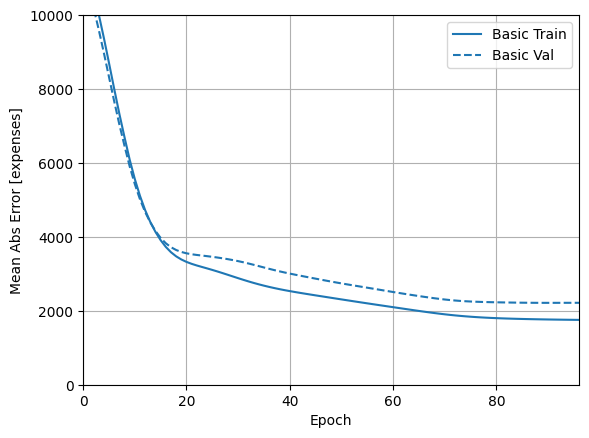

In [7]:
#Training the Model

EPOCH = 200

early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    train_dataset,
    train_labels,
    epochs=EPOCH,
    validation_split=0.2,
    verbose=0,
    callbacks=[tfdocs.modeling.EpochDots(), early_stop]
)

#Visualising the training

plott = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plott.plot({'Basic': history}, metric='mae')
plt.ylabel('Mean Abs Error [expenses]')
plt.ylim([0, 10000])
plt.xlabel('Epoch')

9/9 - 0s - 39ms/step - loss: 2203.4009 - mae: 2203.4009 - mse: 27281278.0000
Testing set Mean Abs Error: 2203.40 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


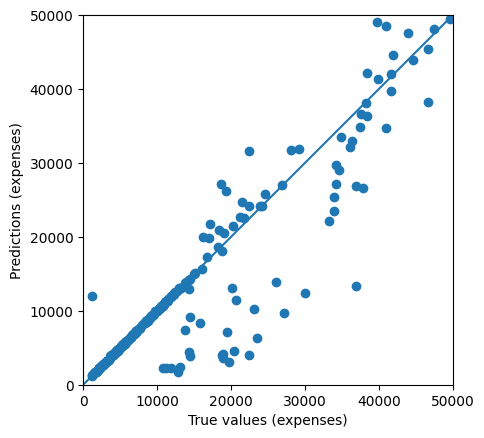

In [8]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
